<a href="https://colab.research.google.com/github/JiM-99-dev/AI_Notepad/blob/main/Mushroom_Species_Pytorch_Lightning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mushroom-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3708144%2F6427080%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240522%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240522T170138Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a459e61c63a271a9f51bb3f6b2d56545793d54735fa8655bd57c33e8aa6ed54070540af975f1a13823f84a01f589e87e8239954a73d1cdfda62255faf550c90680473e3d20ebf5e626d1306581ebc5882793f2f5af6c3878cce849f3e227206761170f6f131d048b97a6ca91fc6078cf09e5aed29456ebdc863a0cef7fff9f25a2ac8aaf8f4faaeeb6cc24f15a6e6326899c4f516b7ef0c22c87424362a7e6443c375f49c44f7f3295cb57d1b5c622d1f4fb070d1b7c80bafb647f6a3c644b990bcb65aea561fdc1d226f26fb77d81d86dd0dd2e98418d180d3404baa5f73f02405ff2942408318eaf81e7ba9477f32c702b9132fb2c86f6d745923fa22fee5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10152025719 bytes downloaded
Downloaded and uncompressed: mushroom-species
Data source import complete.


In [2]:
!setup.py install
!pip install pytorch-lightning

/bin/bash: line 1: setup.py: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 17.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Usi

# Mushroom Species Pytorch Lightning CNN

In [3]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

In [4]:
transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [5]:
dataset0=datasets.ImageFolder(root="/kaggle/input/mushroom-species/dataset",transform=None)

class_names=dataset0.classes
print(class_names)
print(len(class_names))

['Amanita citrina', 'Amanita muscaria', 'Amanita pantherina', 'Amanita rubescens', 'Apioperdon pyriforme', 'Armillaria borealis', 'Artomyces pyxidatus', 'Bjerkandera adusta', 'Boletus edulis', 'Boletus reticulatus', 'Calocera viscosa', 'Calycina citrina', 'Cantharellus cibarius', 'Cerioporus squamosus', 'Cetraria islandica', 'Chlorociboria aeruginascens', 'Chondrostereum purpureum', 'Cladonia fimbriata', 'Cladonia rangiferina', 'Cladonia stellaris', 'Clitocybe nebularis', 'Coltricia perennis', 'Coprinellus disseminatus', 'Coprinellus micaceus', 'Coprinopsis atramentaria', 'Coprinus comatus', 'Crucibulum laeve', 'Daedaleopsis confragosa', 'Daedaleopsis tricolor', 'Evernia mesomorpha', 'Evernia prunastri', 'Flammulina velutipes', 'Fomes fomentarius', 'Fomitopsis betulina', 'Fomitopsis pinicola', 'Ganoderma applanatum', 'Graphis scripta', 'Gyromitra esculenta', 'Gyromitra gigas', 'Gyromitra infula', 'Hericium coralloides', 'Hygrophoropsis aurantiaca', 'Hypholoma fasciculare', 'Hypholoma l

In [6]:
class DataModule(pl.LightningDataModule):

    def __init__(self, transform=transform, batch_size=32):
        super().__init__()
        self.root_dir = "/kaggle/input/mushroom-species/dataset"
        self.transform = transform
        self.batch_size = batch_size

    def setup(self, stage=None):
        dataset = datasets.ImageFolder(root=self.root_dir, transform=self.transform)
        n_data = len(dataset)
        n_train = int(0.8 * n_data)
        n_test = n_data - n_train

        train_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_test])

        self.train_dataset = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        self.test_dataset = DataLoader(test_dataset, batch_size=self.batch_size)

    def train_dataloader(self):
        return self.train_dataset

    def test_dataloader(self):
        return self.test_dataset



In [7]:
class ConvolutionalNetwork(LightningModule):

    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, len(class_names))

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 54 * 54)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        X, y = train_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("train_loss", loss)
        self.log("train_acc", acc)
        return loss

    def validation_step(self, val_batch, batch_idx):
        X, y = val_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("val_loss", loss)
        self.log("val_acc", acc)

    def test_step(self, test_batch, batch_idx):
        X, y = test_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("test_loss", loss)
        self.log("test_acc", acc)

In [8]:
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from torchvision import transforms

In [9]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints/',
    filename='{epoch}-{val_loss:.2f}',
    save_top_k=3,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

if __name__ == '__main__':
    datamodule = DataModule()
    datamodule.setup()
    model = ConvolutionalNetwork()
    trainer = pl.Trainer(
        max_epochs=10,
        callbacks=[checkpoint_callback]
    )
    trainer.fit(model, datamodule)
    datamodule.setup(stage='test')
    test_loader = datamodule.test_dataloader()
    trainer.test(dataloaders=test_loader)

    # Load the best checkpoint
    best_model_path = checkpoint_callback.best_model_path
    model = ConvolutionalNetwork.load_from_checkpoint(best_model_path)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | conv1 | Conv2d | 168   
1 | conv2 | Conv2d | 880   
2 | fc1   | Linear | 5.6 M 
3 | fc2   | Linear | 10.2 K
4 | fc3   | Linear | 1.7 K 
5 | fc4   | Linear | 2.1 K 
---------------------------------
5.6 M     Trainable params
0         Non-trainable params
5.6 M     Total params
22.455    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:383: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'train_acc', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 1935: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 3870: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 5805: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 7740: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 9675: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 11610: 'val_loss' was not in top 3
INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 13545: 'val_loss' was not in top 3
INFO:py

ValueError: `.test(ckpt_path="best")` is set but `ModelCheckpoint` is not configured to save the best model.

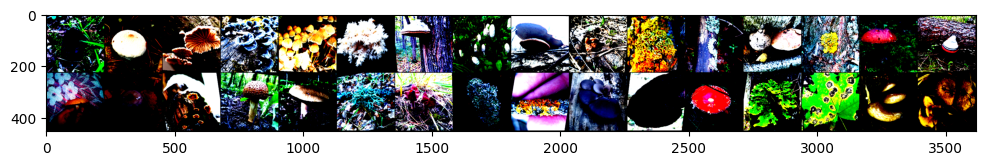

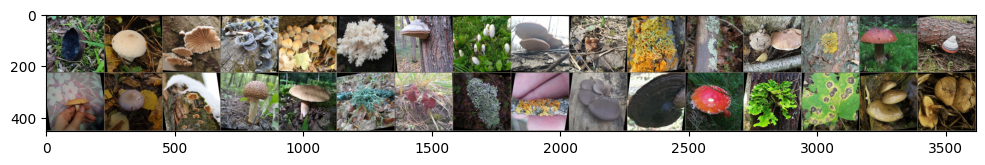

In [10]:
for images, labels in datamodule.train_dataloader():
    break
im=make_grid(images,nrow=16)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

inv_normalize=transforms.Normalize(mean=[-0.485/0.229,-0.456/0.224,-0.406/0.225],
                                   std=[1/0.229,1/0.224,1/0.225])
im=inv_normalize(im)

plt.figure(figsize=(12,12))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [11]:
device = torch.device("cpu")   #"cuda:0"

model.eval()
y_true=[]
y_pred=[]
with torch.no_grad():
    for test_data in datamodule.test_dataloader():
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())

print(classification_report(y_true,y_pred,target_names=class_names,digits=4))

                             precision    recall  f1-score   support

            Amanita citrina     0.2500    0.0159    0.0299        63
           Amanita muscaria     0.7476    0.8779    0.8075       786
         Amanita pantherina     0.0476    0.0145    0.0222        69
          Amanita rubescens     0.4118    0.0673    0.1157       104
       Apioperdon pyriforme     0.2150    0.4488    0.2907       205
        Armillaria borealis     0.0000    0.0000    0.0000        60
        Artomyces pyxidatus     0.8205    0.6995    0.7552       183
         Bjerkandera adusta     0.1294    0.2018    0.1577       109
             Boletus edulis     0.3060    0.3590    0.3304       312
        Boletus reticulatus     0.0000    0.0000    0.0000        51
           Calocera viscosa     0.8171    0.7701    0.7929        87
           Calycina citrina     0.7000    0.5385    0.6087       104
      Cantharellus cibarius     0.3086    0.4970    0.3807       167
       Cerioporus squamosus     0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3. Saving our model and pushing it to hugging face repo

In [17]:
!pip install huggingface_hub

from huggingface_hub import notebook_login
import torch
import os

# Log in to Hugging Face
notebook_login() #to login using this function you will need to provide your
                 #access token from huggung face


In [18]:
# Save your model
import os
torch.save(model.state_dict(), 'testModel.pth')

# Set up and push to Hugging Face repository
from huggingface_hub import HfApi, Repository

model_name = "testModel"  # Choose a name for your model repository
username = "Maravnir"  # Your Hugging Face username
repo_name = f"{username}/{model_name}"
api = HfApi()

# Create the repository if it doesn't exist
api.create_repo(repo_id=repo_name, exist_ok=True, private=False)

repo_url = f"https://huggingface.co/{repo_name}"
repo_local_path = f"./{model_name}"

# Clone the repository to the local path
repo = Repository(local_dir=repo_local_path, clone_from=repo_url)

# Move the saved model file to the repository
os.rename("testModel.pth", os.path.join(repo_local_path, "testModel.pth"))

# Push the model to the repository
repo.push_to_hub(commit_message="Initial commit of the model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message,

Upload file testModel.pth:   0%|          | 1.00/21.4M [00:00<?, ?B/s]

To https://huggingface.co/Maravnir/testModel
   d67a1ea..21f1684  main -> main

   d67a1ea..21f1684  main -> main



'https://huggingface.co/Maravnir/testModel/commit/21f168490a4e44d70f00c515f7020a03588826ec'